In [1]:
cd("../")
pwd()

"/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/PTVAE"

In [2]:

using Pkg
if isfile("Project.toml") && isfile("Manifest.toml")
    Pkg.activate(".")
end

Pkg.instantiate()

#FIXME make the including and using clean. you are including usings in irrelevant files. also including with revise you can check it including only one file and see it is running independently and then continue
using IJulia


using Revise

includet("src/evaluation/evaluation.jl")
includet("src/GLM.jl")
includet("src/structs.jl")
includet("src/load_data.jl")
includet("visualization/visualization.jl")


  Activating environment at `~/Documents/Project_PTVAE/progs/github_repo/PTVAE/Project.toml`


# Simulation Design

## CART-based utility metric

### pre-transformation VAE

In [4]:
path_sim = "runs/run_397"

# path = "runs/run_149"
# utility(path)


ptvae_syn_sim = Matrix(CSV.read("./runs/run_397/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_sim, nothing, ptvae_syn_sim)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 34
Depth:  15
pMSE: 0.08379050535034331
pMSE_ratio: 1.9027170673672547
Standardize_pMSE: 4.804678834934327


### standard VAE

In [5]:
vae_syn_sim = Matrix(CSV.read("./runs/run_398/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_sim, nothing, vae_syn_sim)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 150
Depth:  15
pMSE: 0.11879389212304516
pMSE_ratio: 2.736524780745013
Standardize_pMSE: 8.640838395620728


### QVAE

In [6]:
qvae_syn_sim = Matrix(CSV.read("./runs/run_399/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_sim, nothing, qvae_syn_sim)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 162
Depth:  15
pMSE: 0.11742876412374856
pMSE_ratio: 2.7386637686160324
Standardize_pMSE: 9.472396360697923


### Norta-J

In [7]:
nortaj_syn_sim = Matrix(CSV.read("./Norta-J/202311_sim_method4.csv" , DataFrame, header = true))[:,2:end]
utility(path_sim, nothing, nortaj_syn_sim)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 103
Depth:  15
pMSE: 0.09693283665493686
pMSE_ratio: 2.166838879480512
Standardize_pMSE: 7.084278310673177


### GAN

In [8]:
gan_syn_sim = Matrix(CSV.read("./GAN/runs/run_1/gan/synthetic_data.csv" , DataFrame, header = false))
utility(path_sim, nothing, gan_syn_sim)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 112
Depth:  15
pMSE: 0.17616228772518766
pMSE_ratio: 4.181152901879555
Standardize_pMSE: 15.285885790567734


## density diagrams

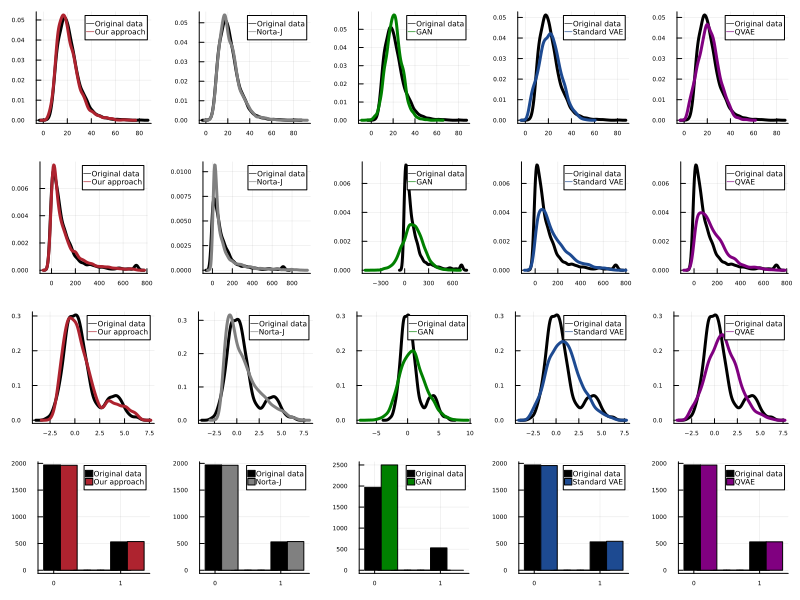

In [28]:
original_data_sim = Matrix(CSV.read("./data/simulation.csv" , DataFrame))
colnames_sim = names(CSV.read("./data/simulation.csv" , DataFrame))


dim_number_sim = 3
dim_name_sim = colnames_sim[dim_number_sim]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p1, ptvae_syn_sim[:,dim_number_sim], label = "Our approach", color = "#AE232F", width = 3, linestyle = :solid)

p2 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p2, nortaj_syn_sim[:,dim_number_sim], label = "Norta-J", color = "gray", width = 3, linestyle = :solid)

p3 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p3, gan_syn_sim[:,dim_number_sim], label = "GAN", color = "green", width = 3)

p4 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p4, vae_syn_sim[:,dim_number_sim], label = "Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid)

p5 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p5, qvae_syn_sim[:,dim_number_sim], label = "QVAE", color = "purple", width = 3)

# Combine plots into a single row
combined_plot = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200), legendfontsize = 6)



dim_number_sim = 8
dim_name_sim = colnames_sim[dim_number_sim]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p1, ptvae_syn_sim[:,dim_number_sim], label = "Our approach", color = "#AE232F", width = 3, linestyle = :solid)

p2 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p2, nortaj_syn_sim[:,dim_number_sim], label = "Norta-J", color = "gray", width = 3, linestyle = :solid)

p3 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p3, gan_syn_sim[:,dim_number_sim], label = "GAN", color = "green", width = 3)

p4 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p4, vae_syn_sim[:,dim_number_sim], label = "Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid)

p5 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p5, qvae_syn_sim[:,dim_number_sim], label = "QVAE", color = "purple", width = 3)

# Combine plots into a single row
combined_plot_1 = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200), legendfontsize = 6)




dim_number_sim = 20
dim_name_sim = colnames_sim[dim_number_sim]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p1, ptvae_syn_sim[:,dim_number_sim], label = "Our approach", color = "#AE232F", width = 3, linestyle = :solid)

p2 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p2, nortaj_syn_sim[:,dim_number_sim], label = "Norta-J", color = "gray", width = 3, linestyle = :solid)

p3 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p3, gan_syn_sim[:,dim_number_sim], label = "GAN", color = "green", width = 3)

p4 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p4, vae_syn_sim[:,dim_number_sim], label = "Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid)

p5 = Plots.density(original_data_sim[:,dim_number_sim], label = "Original data", color = "black", width = 3)
Plots.density!(p5, qvae_syn_sim[:,dim_number_sim], label = "QVAE", color = "purple", width = 3)

# Combine plots into a single row
combined_plot_2 = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200), legendfontsize = 6)






dim_number_sim = 21
dim_name_ist= colnames_sim[dim_number_sim]  # Assuming colnames is defined elsewhere

# Create individual plots

p1 = histogram_plot("", [original_data_sim[:,dim_number_sim], ptvae_syn_sim[:,dim_number_sim]], ["Original data", "Our approach"], ["black" "#AE232F"])

p2 = histogram_plot("",[original_data_sim[:,dim_number_sim], nortaj_syn_sim[:,dim_number_sim]], ["Original data", "Norta-J"], ["black" "gray"])

p3 = histogram_plot("",[original_data_sim[:,dim_number_sim], gan_syn_sim[:,dim_number_sim]], ["Original data", "GAN"], ["black" "green"])

p4 = histogram_plot("",[original_data_sim[:,dim_number_sim], vae_syn_sim[:,dim_number_sim]], ["Original data", "Standard VAE"], ["black" "#1D4A91"])

p5 = histogram_plot("",[original_data_sim[:,dim_number_sim], qvae_syn_sim[:,dim_number_sim]], ["Original data", "QVAE"], ["black" "purple"])

# Combine plots into a single row
combined_plot_3 = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200))



combined_plot_final = Plots.plot(combined_plot, combined_plot_1, combined_plot_2,combined_plot_3, layout = (4, 1), size = (800, 600), legendfontsize = 5)


Plots.plot!(xtickfont=font(4), ytickfont=font(4))

# Display the combined plot
display(combined_plot_final)

# Plots.savefig("./figures/sim_marginal.png")


# IST Data

## CART-based utility metric

### Pre-transformation

In [13]:
path_ist = "runs/run_403"

# path = "runs/run_149"
# utility(path)


ptvae_syn_ist = Matrix(CSV.read("./runs/run_403/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, ptvae_syn_ist)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 55
Depth:  15
pMSE: 0.1370542585964332
pMSE_ratio: 4.402445825525225
Standardize_pMSE: 21.269764504395045


### standard VAE

In [14]:

vae_syn_ist = Matrix(CSV.read("./runs/run_401/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, vae_syn_ist)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 49
Depth:  15
pMSE: 0.14724744658454397
pMSE_ratio: 4.845942054022085
Standardize_pMSE: 22.91493180029246


### QVAE

In [15]:

qvae_syn_ist = Matrix(CSV.read("./runs/run_402/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, qvae_syn_ist)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 51
Depth:  15
pMSE: 0.14870665910990477
pMSE_ratio: 4.965149781646363
Standardize_pMSE: 19.733257938390448


### GAN

In [16]:
gan_syn_ist = Matrix(CSV.read("./GAN/runs/run_2/gan/synthetic_data.csv" , DataFrame, header = false))
utility(path_ist, nothing, gan_syn_ist)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 66
Depth:  15
pMSE: 0.18287719808022687
pMSE_ratio: 6.416583907980437
Standardize_pMSE: 28.25007694613162


### Norta-j

In [17]:
nortaj_syn_ist = Matrix(CSV.read("./Norta-J/202311_IST_two_regions_method4.csv" , DataFrame, header = true))[:,2:end]
utility(path_ist, nothing, nortaj_syn_ist)

DecisionTreeClassifier
max_depth:                15
min_samples_leaf:         20
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 3
Depth:  2
pMSE: 0.24952193475815526
pMSE_ratio: 5.7216373127360916
Standardize_pMSE: 36.303353858226316


## density diagrams

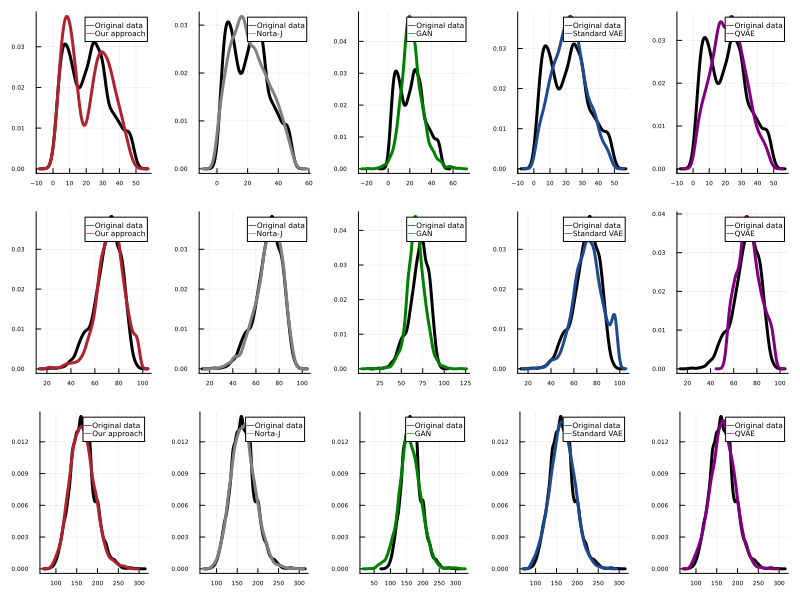

In [23]:
original_data_ist = Matrix(CSV.read("./data/ist_randomization_data_smaller_no_west_no_south_aug5.csv" , DataFrame))[:,1:end-2]
colnames_ist = names(CSV.read("./data/ist_randomization_data_smaller_no_west_no_south_aug5.csv" , DataFrame))

dim_number_ist= 3
dim_name_ist= colnames_ist[dim_number_ist]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p1, ptvae_syn_ist[:,dim_number_ist], label = "Our approach", color = "#AE232F", width = 3, linestyle = :solid)

p2 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p2, nortaj_syn_ist[:,dim_number_ist], label = "Norta-J", color = "gray", width = 3, linestyle = :solid)

p3 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p3, gan_syn_ist[:,dim_number_ist], label = "GAN", color = "green", width = 3)

p4 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p4, vae_syn_ist[:,dim_number_ist], label = "Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid)

p5 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p5, qvae_syn_ist[:,dim_number_ist], label = "QVAE", color = "purple", width = 3)

# Combine plots into a single row
combined_plot = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200), legendfontsize = 6)



dim_number_ist= 5
dim_name_ist= colnames_ist[dim_number_ist]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p1, ptvae_syn_ist[:,dim_number_ist], label = "Our approach", color = "#AE232F", width = 3, linestyle = :solid)

p2 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p2, nortaj_syn_ist[:,dim_number_ist], label = "Norta-J", color = "gray", width = 3, linestyle = :solid)

p3 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p3, gan_syn_ist[:,dim_number_ist], label = "GAN", color = "green", width = 3)

p4 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p4, vae_syn_ist[:,dim_number_ist], label = "Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid)

p5 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p5, qvae_syn_ist[:,dim_number_ist], label = "QVAE", color = "purple", width = 3)

# Combine plots into a single row
combined_plot_1 = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200), legendfontsize = 6)




dim_number_ist= 12
dim_name_ist= colnames_ist[dim_number_ist]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p1, ptvae_syn_ist[:,dim_number_ist], label = "Our approach", color = "#AE232F", width = 3, linestyle = :solid)

p2 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p2, nortaj_syn_ist[:,dim_number_ist], label = "Norta-J", color = "gray", width = 3, linestyle = :solid)

p3 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p3, gan_syn_ist[:,dim_number_ist], label = "GAN", color = "green", width = 3)

p4 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p4, vae_syn_ist[:,dim_number_ist], label = "Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid)

p5 = Plots.density(original_data_ist[:,dim_number_ist], label = "Original data", color = "black", width = 3)
Plots.density!(p5, qvae_syn_ist[:,dim_number_ist], label = "QVAE", color = "purple", width = 3)

# Combine plots into a single row
combined_plot_2 = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200), legendfontsize = 6)






# dim_number_ist= 21
# dim_name_ist= colnames[dim_number_ist]  # Assuming colnames is defined elsewhere

# # Create individual plots

# p1 = histogram_plot("", [original_data_ist[:,dim_number_ist], ptvae_syn_ist[:,dim_number_ist]], ["Original data", "Our approach"], ["black" "#AE232F"])

# p2 = histogram_plot("",[original_data_ist[:,dim_number_ist], nortaj_syn[:,dim_number_ist]], ["Original data", "Norta-J"], ["black" "gray"])

# p3 = histogram_plot("",[original_data_ist[:,dim_number_ist], gan_syn_ist[:,dim_number_ist]], ["Original data", "GAN"], ["black" "green"])

# p4 = histogram_plot("",[original_data_ist[:,dim_number_ist], vae_syn_ist[:,dim_number_ist]], ["Original data", "Standard VAE"], ["black" "#1D4A91"])

# p5 = histogram_plot("",[original_data_ist[:,dim_number_ist], qvae_syn_ist[:,dim_number_ist]], ["Original data", "QVAE"], ["black" "purple"])

# # Combine plots into a single row
# combined_plot_3 = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200))



combined_plot_final = Plots.plot(combined_plot, combined_plot_1, combined_plot_2, layout = (3, 1), size = (800, 600), legendfontsize = 5)


Plots.plot!(xtickfont=font(4), ytickfont=font(4))

# Display the combined plot
display(combined_plot_final)

# Plots.savefig("./figures/ist_marginal.png")
